+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               100|
|   mean|             39.66|
| stddev|12.032128706597232|
|    min|                18|
|    max|                59|
+-------+------------------+

Outliers in Age:
+-------+----+---+------+------+-------+--------+
|User_ID|Name|Age|Gender|Income|Contact|Location|
+-------+----+---+------+------+-------+--------+
+-------+----+---+------+------+-------+--------+

Tabular Data:
+-------+-----------------+---+------+------+--------------------+--------------------+
|User_ID|             Name|Age|Gender|Income|             Contact|            Location|
+-------+-----------------+---+------+------+--------------------+--------------------+
|      1|    Heather Burke| 35|Female| 68059|        347-414-3911|61.389715, -7.198571|
|      2|   Margaret Brown| 40|  Male| 73613|     +1-632-865-1129|-61.234150, -9.52...|
|      3|     Pamela Crane| 53|  Male| 75572|  816.752.4431x56859|

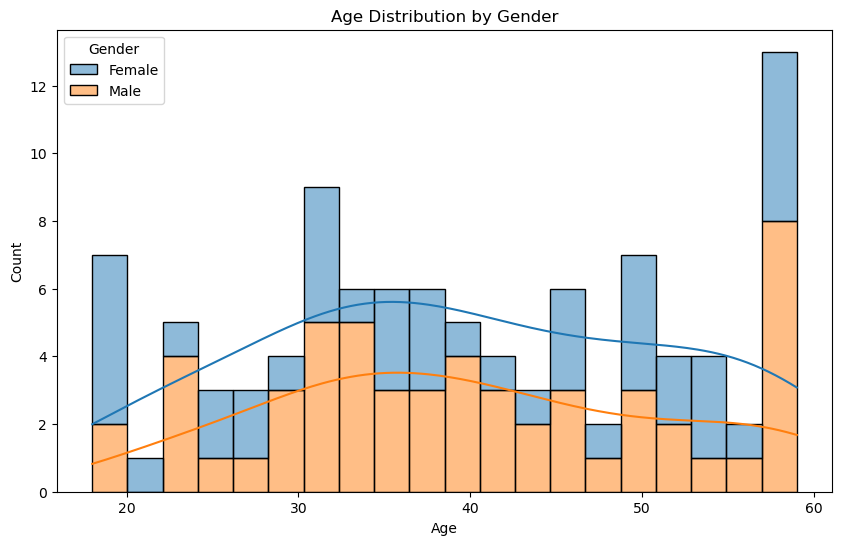

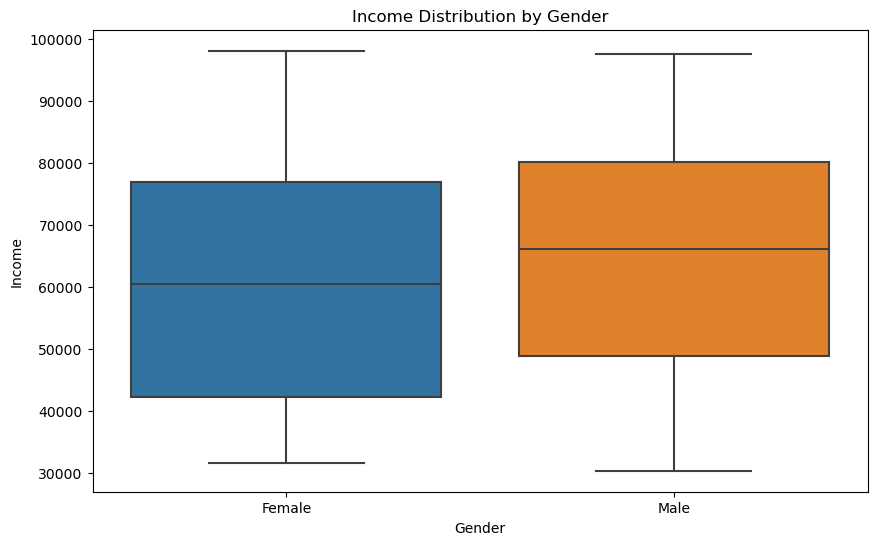

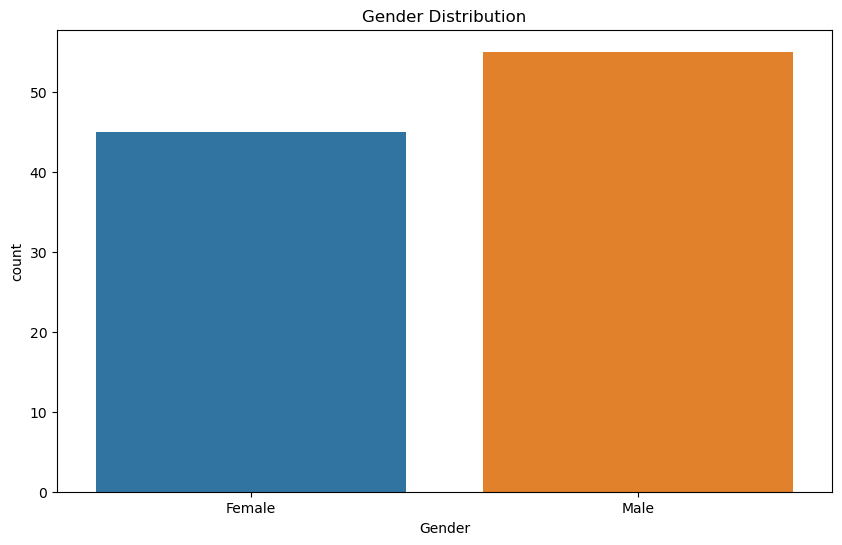

In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

class UserProfilesReport:
    def __init__(self, spark_session, data_path):
        self.spark = spark_session
        self.data_path = data_path

    def load_data(self):
        return self.spark.read.csv(self.data_path, header=True, inferSchema=True)

    def preprocess_data(self, data):
        # Handle null values for numerical attribute 'Age'
        data = data.na.fill({'Age': data.select(F.mean('Age')).collect()[0][0]})
        return data

    def describe_age(self, data):
        # Profile numerical attribute 'Age'
        data.select('Age').describe().show()

    def find_outliers(self, data):
        # Explain outliers for numerical attribute 'Age'
        outliers = data.filter(F.col('Age') > 100)
        print("Outliers in Age:")
        outliers.show()

    def visualize_data(self, data):
        # Print tabular data
        print("Tabular Data:")
        data.show()

        # Plot Age Distribution by Gender
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data.toPandas(), x='Age', hue='Gender', bins=20, multiple='stack', kde=True)
        plt.title('Age Distribution by Gender')
        plt.show()

        # Plot Income Distribution by Gender
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Gender', y='Income', data=data.toPandas())
        plt.title('Income Distribution by Gender')
        plt.show()

        # Plot Gender Distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Gender', data=data.toPandas())
        plt.title('Gender Distribution')
        plt.show()

# Example of usage
spark = SparkSession.builder.appName("UserProfilesJob").getOrCreate()
user_profiles_report = UserProfilesReport(spark, '/home/raja/Documents/MS-DATA-SCIENCE/Fall-2023/Big-Data-Project/UserProfiles_data.csv')
user_profiles_data = user_profiles_report.load_data()
user_profiles_data = user_profiles_report.preprocess_data(user_profiles_data)
user_profiles_report.describe_age(user_profiles_data)
user_profiles_report.find_outliers(user_profiles_data)
user_profiles_report.visualize_data(user_profiles_data)
